# NBA 2019/2020 Season Restart Prediction

In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import sklearn as sk

In [2]:
fileName_TPGS = 'datasets/2019_2020_Regular_TPGS.csv'
fileName_OPGS = 'datasets/2019_2020_Regular_OPGS.csv'
fileName_Miscellaneous = 'datasets/2019_2020_Miscellaneous.csv'
fileName_Results = 'datasets/2019_2020_Regular_Results.csv'

In [3]:
df_Results = pd.read_csv(fileName_Results)
df_Results.drop(columns = ['Start (ET)', 'Unnamed: 6', 'Unnamed: 7', 'Notes', 'Attend.', 'Notes'], inplace = True)
df_Results["MarginHome"] = df_Results['PTS.1'] - df_Results['PTS']
df_Results.columns = ['Date', 'Team Away', 'Points Away', 'Team Home', 'Points Home', 'Margin Home']

In [4]:
df_Results

,Date,Team Away,Points Away,Team Home,Points Home,Margin Home
0,Tue Oct 22 2019,New Orleans Pelicans,122,Toronto Raptors,130,8
1,Tue Oct 22 2019,Los Angeles Lakers,102,Los Angeles Clippers,112,10
2,Wed Oct 23 2019,Chicago Bulls,125,Charlotte Hornets,126,1
3,Wed Oct 23 2019,Detroit Pistons,119,Indiana Pacers,110,-9
4,Wed Oct 23 2019,Cleveland Cavaliers,85,Orlando Magic,94,9
...,...,...,...,...,...,...
966,Tue Mar 10 2020,Los Angeles Clippers,131,Golden State Warriors,107,-24
967,Wed Mar 11 2020,Detroit Pistons,106,Philadelphia 76ers,124,18
968,Wed Mar 11 2020,New York Knicks,136,Atlanta Hawks,131,-5
969,Wed Mar 11 2020,Charlotte Hornets,109,Miami Heat,98,-11


## How frequently do the home teams win?

Typically, the assumption is that home teams will win more often than not.

In [5]:
df_Results['Home Win'] = df_Results['Margin Home'] > 0
y_true = df_Results['Home Win'].values

In [6]:
df_Results

,Date,Team Away,Points Away,Team Home,Points Home,Margin Home,Home Win
0,Tue Oct 22 2019,New Orleans Pelicans,122,Toronto Raptors,130,8,True
1,Tue Oct 22 2019,Los Angeles Lakers,102,Los Angeles Clippers,112,10,True
2,Wed Oct 23 2019,Chicago Bulls,125,Charlotte Hornets,126,1,True
3,Wed Oct 23 2019,Detroit Pistons,119,Indiana Pacers,110,-9,False
4,Wed Oct 23 2019,Cleveland Cavaliers,85,Orlando Magic,94,9,True
...,...,...,...,...,...,...,...
966,Tue Mar 10 2020,Los Angeles Clippers,131,Golden State Warriors,107,-24,False
967,Wed Mar 11 2020,Detroit Pistons,106,Philadelphia 76ers,124,18,True
968,Wed Mar 11 2020,New York Knicks,136,Atlanta Hawks,131,-5,False
969,Wed Mar 11 2020,Charlotte Hornets,109,Miami Heat,98,-11,False


In [7]:
total_games = df_Results['Home Win'].count()
total_home_wins = df_Results['Home Win'].sum()
win_percent = total_home_wins / total_games

print('Home Win Percentage: {0:.2f}%'.format(100 * win_percent))

Home Win Percentage: 55.10%


The home teams' win percentage is 58.0%. If a model is considered useful, it must (at minimum) have a better score than the established baseline.

### Visualization

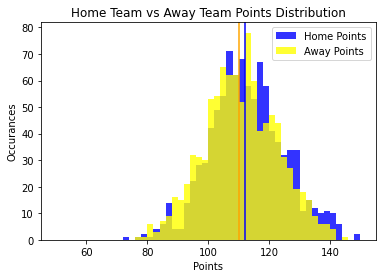

In [32]:
plt.hist('Points Home', data = df_Results, bins = 50, range = (50, 150), color = 'blue', alpha = 0.8, label = 'Home Points')
plt.hist('Points Away', data = df_Results, bins = 50, range = (50, 150), color = 'yellow', alpha = 0.8, label = 'Away Points')
plt.title('Home Team vs Away Team Points Distribution')
plt.xlabel('Points')
plt.ylabel('Occurances')
plt.legend()

home_median = df_Results['Points Home'].median()
away_median = df_Results['Points Away'].median()
plt.axvline(home_median, color = 'blue')
plt.axvline(away_median, color = 'orange')

plt.show()

### Setting up a Classifier

In [8]:
# Predicting the baseline for Home Teams wins with Binary Classification

from sklearn.metrics import f1_score

y_pred = [1] * len(y_true)
print('F1: {0:.4f}%'.format(f1_score(y_true, y_pred, pos_label = None, average = 'weighted') * 100))

F1: 39.1465%


The calculated F1 score of 39.1% is the score to beat.

### Streaks

In [35]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 2020)

In [10]:
df_Results['Home Last Win'] = False
df_Results['Visitor Last Win'] = False

## Further EDA

### Expected Values and Deviation

In [41]:
print('Margin of Victor STDDEV: ', df_Results['Margin Home'].std())
print('Total Points STDDEV: ', (df_Results['Points Home'] + df_Results['Points Away']).std())

Margin of Victor STDDEV:  14.22271064173993
Total Points STDDEV:  20.23190483743157


### Differentiation of Winners and Losers

## Further Data Cleaning

In [36]:
df_TPGS = pd.read_csv(fileName_TPGS)
df_TPGS

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1.0,Dallas Mavericks,67,241.5,41.6,90.0,0.462,15.3,41.5,0.369,...,0.773,10.6,36.4,47.0,24.5,6.3,5.0,12.8,19.0,116.4
1,2.0,Milwaukee Bucks*,65,240.8,43.5,91.2,0.477,13.7,38.6,0.356,...,0.742,9.5,42.2,51.7,25.9,7.4,6.0,14.9,19.2,118.6
2,3.0,Houston Rockets*,64,241.2,41.1,90.7,0.454,15.4,44.3,0.348,...,0.787,10.4,34.6,44.9,21.5,8.5,5.1,14.7,21.6,118.1
3,4.0,Portland Trail Blazers,66,240.8,41.9,90.9,0.461,12.6,33.8,0.372,...,0.798,10.1,35.4,45.5,20.2,6.1,6.2,13.0,21.4,113.6
4,5.0,Atlanta Hawks,67,243.0,40.6,90.6,0.449,12.0,36.1,0.333,...,0.790,9.9,33.4,43.3,24.0,7.8,5.1,16.2,23.1,111.8
5,6.0,New Orleans Pelicans,64,242.3,42.6,92.2,0.462,14.0,37.6,0.372,...,0.729,11.2,35.8,47.0,27.0,7.6,5.1,16.2,21.0,116.2
6,7.0,Los Angeles Clippers*,64,241.2,41.6,89.7,0.464,12.2,33.2,0.366,...,0.792,11.0,37.0,48.0,23.8,7.1,5.0,14.8,22.0,116.2
7,8.0,Washington Wizards,64,241.2,41.9,91.0,0.461,12.3,33.1,0.372,...,0.787,10.1,31.6,41.7,25.3,8.1,4.3,14.1,22.6,115.6
8,9.0,Memphis Grizzlies,65,240.4,42.8,91.0,0.470,10.9,31.1,0.352,...,0.761,10.4,36.3,46.7,27.0,8.0,5.6,15.3,20.8,112.6
9,10.0,Phoenix Suns,65,241.2,40.8,87.8,0.464,11.2,31.7,0.353,...,0.826,9.8,33.3,43.1,27.2,7.8,4.0,15.1,22.1,112.6


In [37]:
df_OPGS = pd.read_csv(fileName_OPGS)
df_OPGS

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1.0,Los Angeles Lakers*,63,240.8,39.0,87.7,0.444,11.3,33.0,0.342,...,0.774,9.8,32.5,42.3,23.2,8.2,3.7,15.7,21.4,106.9
1,2.0,Toronto Raptors*,64,241.6,37.9,88.5,0.429,13.0,38.5,0.337,...,0.768,11.2,35.1,46.3,25.6,7.0,5.3,16.8,20.0,106.5
2,3.0,Boston Celtics*,64,242.0,38.3,86.8,0.442,11.8,34.5,0.342,...,0.761,10.2,34.0,44.3,22.2,7.0,5.6,15.3,20.6,106.8
3,4.0,Utah Jazz*,64,240.4,40.3,89.3,0.452,11.1,31.6,0.351,...,0.769,9.6,33.0,42.6,21.2,7.8,4.6,12.0,20.6,107.9
4,5.0,Oklahoma City Thunder*,64,241.6,41.1,90.0,0.456,11.4,33.2,0.344,...,0.795,10.4,34.0,44.4,23.1,6.7,4.1,14.0,22.8,108.3
5,6.0,Orlando Magic,65,240.4,40.1,86.6,0.463,12.4,33.4,0.370,...,0.772,9.1,36.0,45.1,24.5,7.0,4.8,14.8,19.2,107.3
6,7.0,Milwaukee Bucks*,65,240.8,38.7,93.8,0.413,13.7,38.6,0.356,...,0.784,9.4,36.3,45.7,23.8,7.4,4.6,14.3,21.3,107.4
7,8.0,Philadelphia 76ers*,65,241.2,39.6,85.6,0.462,10.2,28.9,0.354,...,0.742,8.6,33.3,41.9,22.7,7.0,3.9,14.0,20.3,107.4
8,9.0,Indiana Pacers*,65,241.5,39.5,88.1,0.448,11.4,33.2,0.345,...,0.789,10.1,34.6,44.7,23.2,6.8,4.5,14.4,18.6,107.4
9,10.0,Denver Nuggets*,65,242.3,39.6,86.2,0.459,11.6,33.6,0.346,...,0.756,10.0,32.8,42.8,25.0,7.1,4.5,14.3,20.0,107.4


In [38]:
df_Miscellaneous = pd.read_csv(fileName_Miscellaneous)
df_Miscellaneous

,Rk,Team,Age,W,L,PW,PL,MOV,SOS,SRS,...,TOV%,ORB%,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Arena,Attend.,Attend./G
0,1.0,Milwaukee Bucks*,29.2,53.0,12.0,52,13,11.29,-0.85,10.44,...,12.8,20.7,0.196,0.486,12.2,81.7,0.172,Fiserv Forum,549036,17711
1,2.0,Los Angeles Lakers*,29.6,49.0,14.0,45,18,7.41,0.34,7.75,...,13.2,24.6,0.196,0.509,13.8,78.4,0.202,STAPLES Center,588907,18997
2,3.0,Los Angeles Clippers*,27.4,44.0,20.0,44,20,6.52,0.22,6.74,...,12.7,24.0,0.232,0.503,12.3,77.3,0.210,STAPLES Center,610176,19068
3,4.0,Toronto Raptors*,26.6,46.0,18.0,44,20,6.45,-0.57,5.88,...,12.8,21.6,0.205,0.502,14.6,76.1,0.200,Scotiabank Arena,633456,19796
4,5.0,Dallas Mavericks,26.2,40.0,27.0,45,22,6.04,-0.21,5.84,...,11.3,23.5,0.198,0.519,10.9,77.4,0.172,American Airlines Center,682096,20062
5,6.0,Boston Celtics*,25.3,43.0,21.0,44,20,6.17,-0.48,5.69,...,12.0,23.9,0.204,0.510,13.6,77.5,0.212,TD Garden,610864,19090
6,7.0,Houston Rockets*,29.1,40.0,24.0,39,25,3.75,0.03,3.78,...,12.6,22.4,0.226,0.528,13.5,75.6,0.194,Toyota Center,578458,18077
7,8.0,Utah Jazz*,27.5,41.0,23.0,38,26,3.17,0.03,3.20,...,13.6,21.2,0.208,0.514,10.9,79.0,0.180,Vivint Smart Home Arena,567486,18306
8,9.0,Denver Nuggets*,25.6,43.0,22.0,39,26,2.95,0.06,3.02,...,12.3,24.7,0.178,0.526,13.0,77.0,0.194,Pepsi Center,633153,19186
9,10.0,Oklahoma City Thunder*,25.6,40.0,24.0,37,27,2.45,0.34,2.79,...,12.3,19.2,0.233,0.520,12.4,76.8,0.164,Chesapeake Energy Arena,600699,18203
